In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Paridade Put-Call

In [3]:
premio_c = 0.5
premio_p = 3

strike = 55
venc = 1 # Vencimento da estratégia em anos
rf = 0.13 # *100 '% a.a'
m_rf = 0
S0 = 57


## Descobrir "c" (Prêmio da Call)
c_0 = premio_p + S0 - (strike)/((1+rf)**venc)
# c_0 = premio_p + S0 - (strike)*np.exp(-rf * t) # Contínua

## Descobrir "p" (Prêmio da Put)
p_0 = premio_c + (strike)/((1+rf)**venc) - S0
# p_0 = premio_c + (strike)*np.exp(-rf * t) - S0 # Contínua

In [7]:
c_0+5

16.32743362831858

### Modelo Binário por 'q' (1p)

In [10]:
# INPUTS
cenario_up = 60
cenario_down = 40
S0 = 50
strike = 50
rf = 0.1
tipo = "call"
# #

u = cenario_up/S0
d = cenario_down/S0

q = (1 + rf - d)/(u - d)

if tipo == "call":
    payoff_up = cenario_up - strike if cenario_up > strike else 0
    payoff_down = cenario_down - strike if cenario_down > strike else 0
else:
    payoff_up = strike - cenario_up if cenario_up > strike else 0
    payoff_down = strike - cenario_down if cenario_down > strike else 0

premio = (q * payoff_up + (1-q)* payoff_down)/ (1+rf)

### Modelo Binário por "pr" (1p)

In [11]:
# INPUTS
cenario_up = 88
cenario_down = 72
S0 = 80
strike = 85
rf = 0.15
tipo = "call"
# #

u = cenario_up/S0
d = cenario_down/S0

q = (1 + rf - d)/(u - d)
if abs(q) > 1:
    print("Arbitragem: q =", q)

if tipo == "call":
    payoff_up = cenario_up - strike if cenario_up > strike else 0
    payoff_down = cenario_down - strike if cenario_down > strike else 0
else:
    payoff_up = strike - cenario_up if strike > cenario_up else 0
    payoff_down = strike - cenario_down if strike > cenario_down else 0

delta = (payoff_up - payoff_down) / ((u - d)* S0)
B = (u * payoff_down - d * payoff_up) / ((u  - d) * (1 + rf))

V0 = B + delta * S0

Arbitragem: q = 1.2499999999999991


In [12]:
print(delta, B)

0.18749999999999992 -11.739130434782606


### Função Payout -> Beta, Delta

In [13]:
def port_repl(u, d, rf, S0, payoff_up, payoff_down, t_rf = 1):
    delta = (payoff_up - payoff_down) / ((u - d)* S0)
    B = (u * payoff_down - d * payoff_up) / ((u  - d) * ((1 + rf)**t_rf))
    V0 = B + delta * S0
    return V0

### Modelo Binomial (2p) "pr"

In [14]:
# INPUTS
cenario_up = 196
cenario_mid = 84
cenario_down = 36
S0 = 100
strike = 84
rf = 0.1
tipo = "put"
# #

u = (cenario_up/S0)**(1/2)
d = (cenario_down/S0)**(1/2)


if tipo == "call":
    payoff_up = cenario_up - strike if cenario_up > strike else 0
    payoff_midu = cenario_mid - strike if cenario_mid > strike else 0
    payoff_down = cenario_down - strike if cenario_down > strike else 0
else:
    payoff_up = strike - cenario_up if cenario_up < strike else 0
    payoff_mid = strike - cenario_mid if cenario_mid < strike else 0
    payoff_down = strike - cenario_down if cenario_down < strike else 0

delta_up = (payoff_up - payoff_mid) / ((u - d)* S0*u)
delta_down = (payoff_mid - payoff_down) / ((u - d)* S0*d)

B_up = (u * payoff_mid - d * payoff_up) / ((u  - d) * (1 + rf))
B_down = (u * payoff_down - d * payoff_mid) / ((u  - d) * (1 + rf))

V1u = B_up + delta_up * S0*u
V1d = B_down + delta_down * S0*d

delta = (V1u - V1d)/((u-d)*S0)
B = (u * V1d - d * V1u) / ((u  - d) * (1 + rf))

V0 = B + delta * S0

### Modelo Binomial (2p) "q"

In [15]:
# INPUTS
cenario_up = 196
cenario_mid = 84
cenario_down = 36
S0 = 100
strike = 84
rf = 0.1
tipo = "put"
# #

u = (cenario_up/S0)**(1/2)
d = (cenario_down/S0)**(1/2)

q = (1 + rf - d)/(u - d)

if tipo == "call":
    payoff_up = cenario_up - strike if cenario_up > strike else 0
    payoff_midu = cenario_mid - strike if cenario_mid > strike else 0
    payoff_down = cenario_down - strike if cenario_down > strike else 0
else:
    payoff_up = strike - cenario_up if cenario_up < strike else 0
    payoff_mid = strike - cenario_mid if cenario_mid < strike else 0
    payoff_down = strike - cenario_down if cenario_down < strike else 0

premio_1u = (q * payoff_up + (1-q)* payoff_mid)/ (1+rf)
premio_1d = (q * payoff_mid + (1-q)* payoff_down)/ (1+rf)

premio = (q * premio_1u + (1-q)* premio_1d)/ (1+rf)

### Modelo Binomial (3p) "q"

In [16]:
# # # Raiz "Modelo Binário por 'pr' "
# INPUTS
cenario_up = 144
cenario_midu = 96
cenario_midd = 96
cenario_down = 64
S0 = 100
strike = 100
rf = 0.1
tipo = "put"
# #

u = (cenario_up/S0)**(1/3)
d = (cenario_down/S0)**(1/3)

q = (1 + rf - d)/(u - d)

if tipo == "call":
    payoff_up = cenario_up - strike if cenario_up > strike else 0
    payoff_midu = cenario_midu - strike if cenario_midu > strike else 0
    payoff_midd = cenario_midd - strike if cenario_midd > strike else 0
    payoff_down = cenario_down - strike if cenario_down > strike else 0
else:
    payoff_up = strike - cenario_up if cenario_up < strike else 0
    payoff_midu = strike - cenario_midu if cenario_midu < strike else 0
    payoff_midd = strike - cenario_midd if cenario_midd < strike else 0
    payoff_down = strike - cenario_down if cenario_down < strike else 0

premio_2uu = (q * payoff_up + (1-q)* payoff_midu)/ (1+rf)
premio_2ud = (q * payoff_midu + (1-q)* payoff_midd)/ (1+rf)
premio_2dd = (q * payoff_midd + (1-q)* payoff_down)/ (1+rf)

premio_1u = (q * premio_2uu + (1-q)* premio_2ud)/ (1+rf)
premio_1d = (q * premio_2ud + (1-q)* premio_2dd)/ (1+rf)

premio_0 = (q * premio_1u + (1-q)* premio_1d)/ (1+rf)

# OPCOES - Derivativos

In [17]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [18]:
class derivative_operation:
    def __init__(self, derivative = "Call", name = "", strike = 0, venc = 0, side = "titular", sit = "M", object_ = "", premium = 0, qnt = 0, rng = False):
        self.derivative = derivative                # "Call" ou "Put"
        self.strike = strike                        # Preço de Exercício (Strike)
        self.venc = venc                            # Dias até o vencimento
        self.side = side                            # lado "titular" or "lancador"
        self.sit = sit                              # "ITM", "ATM", "OTM"
        self.object = object_                       # Ativo subjascente/objeto
        self.premium = premium                      # Prêmio da Opção / Preço da Opção
        self.rng = [int(-self.strike/2), int(self.strike/2)] if len(rng) == False  else rng
        self.side_num =  1 if side == "titular" else -1
        self.qnt = qnt          # lado (binário)      
        self.name = name  

        self.payoff_t = 0
        self.net_earn = 0
        self.st = 0
        
    def __str__(self):
        return " %s - %s, Q°: %.1f, STRIKE: R$ %.2f" % (self.name, self.derivative, self.qnt, self.strike)

    def payoff_time(self): # Método que dado os imputs da classe, calcula os payoffs dado o ativo subjascente/objeto
        object_t = np.linspace(self.rng[0], self.rng[1], 10000)

        if self.derivative == "Call":
            payoff_t = np.maximum(object_t - self.strike, 0)
        else:
            payoff_t = np.maximum(self.strike - object_t, 0)

        if self.side == "lancador":
            payoff_t = -payoff_t

        self.payoff_t = payoff_t.tolist()
        self.st = object_t.tolist()

    def net_earnings(self): # Método que dado os imputs da classe, calcula os lucros contábeis dado o ativo subjascente/objeto
        self.payoff_time()
        if self.side =="titular":
            net_earn = np.array(self.payoff_t) - self.premium
        else:
            net_earn = np.array(self.payoff_t) + self.premium
        self.net_earn = net_earn.tolist()
    
    def payoffgraph(self): # Método que dado plota um gráfico dos payoffs calculados pelo método "payoff_time"
        self.net_earnings()
        plt.plot(self.st, self.payoff_t)
        plt.axvline(x = self.strike, color = "b", linestyle = "dashed", ymax = self.strike)
        plt.show()

    def earn_graph(self): # Método que dado plota um gráfico dos payoffs calculados pelo método "net_earnings"
        self.net_earnings()
        plt.style.use('ggplot') ## ESTILO ##
        plt.plot(self.st, self.payoff_t)
        plt.plot(self.st, self.net_earn, ls = "--")
        plt.axvline(x = self.strike, color = "b", linestyle = "dotted", ymax = self.strike)
        plt.xlabel("St")
        plt.ylabel("Payoff")
        plt.show()

def estrategias_comb(args, m_rf = 0, c_rf = 0, qnt_ao = 0, s0 = 0, graph=False, method="payoff", horizontal_zero=False, return_out=False):
    n = len(args)
    if n == 0:
        return None
    for i in range(n):
        args[i].rng = args[0].rng
        args[i].net_earnings()
    ativo_obj = args[0].st
    count_s = sum([x > 0 for x in [arg.qnt for arg in args]] + [m_rf > 0, qnt_ao > 0])

    FCx0 = -(c_rf) - (qnt_ao*s0) - sum([arg.premium * arg.qnt * arg.side_num for arg in args]) + m_rf
    
    if method == "payoff":
        payoff_c = [(sum([args[j].payoff_t[i] * args[j].qnt for j in range(n)]) + m_rf + (qnt_ao * ativo_obj[i])) for i in range(len(ativo_obj))] 
        data1 = payoff_c
        name_d = "Payoff"

    elif method == "both":
        payoff_c = [(sum([args[j].payoff_t[i] * args[j].qnt for j in range(n)]) + m_rf + (qnt_ao * ativo_obj[i])) for i in range(len(ativo_obj))] 
        netearn_c = [(sum([args[j].net_earn[i] * args[j].qnt for j in range(n)]) + (m_rf - c_rf) + ((ativo_obj[i] - s0) * qnt_ao)) for i in range(len(ativo_obj))] 
        data1 = payoff_c
        data2 = netearn_c
        name_d = ["Payoff", "Net Earn"]
    else:
        netearn_c = [(sum([args[j].net_earn[i] * args[j].qnt for j in range(n)]) + (m_rf - c_rf) + ((ativo_obj[i] - s0) * qnt_ao)) for i in range(len(ativo_obj))] 
        data1 = netearn_c
        name_d = "Net Earn"
        
    if graph:
        if horizontal_zero:
            plt.axhline(y = 0, color = "black")
        plt.plot(ativo_obj, data1)
        if method == "both":
            plt.plot(ativo_obj, data2)
        for i in range(n):
            plt.axvline(x = args[i].strike, color = ["b","r","g","c","m","y"][i], linestyle = "dotted")
        plt.xlabel("St")
        plt.ylabel("Payoff")
        legend_labels = ["0"] + name_d + [str(arg)[:-16] for arg in args]
        plt.legend(legend_labels, prop={'size': 7})
    
    if return_out:
        #~
        if FCx0 < 0:
            perc_ret = [100*(ne)/-FCx0 for ne in netearn_c]
        else:
            perc_ret = ["FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA DE CAIXA" for ne in netearn_c]
        #~
        return pd.DataFrame([args[0].st, payoff_c, netearn_c, perc_ret], index = ["Ativo Objeto (St)", "Payoff", "Net Earn (Resultado)", "%"]), FCx0, count_s
    
def output_table(tab_fcx_count):
    table = tab_fcx_count[0]
    fcx0 = np.round(tab_fcx_count[1], 4)
    count = tab_fcx_count[2]
    print("\n\nX-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X\nDADOS FINAIS DA ESTRATÉGIA\nX-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X\n")
    print(" Você realizou uma estratégia com {} operações. \n\n O fluxo de caixa inicial é de R$ {} (OBS: Se positivo > Entrada de caixa, Se negativo > Saída de caixa)\n\n".format(count, fcx0))
    print(" TABELA DE VALORES PARA A ESTRATÉGIA MONTADA\n\n")
    print(table.T)


In [26]:
# Definindo parâmetros das opçoes
option1 = derivative_operation("Call", strike = 100, venc = 0, side = "lancador", premium = 35, qnt = 1, rng = [90, 160])
option2 = derivative_operation("Put", strike =150, venc = 0, side = "lancador", premium = 20, qnt = 1,  rng = [50, 140])
option3 = derivative_operation("Call", strike =100, venc = 0, side = "lancador", premium = 1, qnt = 0, rng = [50, 140])

c_rf = 0 # capital rf
m_rf = 0 # montante rf

qnt_a_o = 0 # quantidade ativo objeto
s0 = 0 # preço pago em t=0 para o ativo objeto

opcoes = [option1, option2, option3]
s0 = 0
qnt_ao = 0
c_rf = 0
m_rf = 0




X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X
DADOS FINAIS DA ESTRATÉGIA
X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X

 Você realizou uma estratégia com 2 operações. 

 O fluxo de caixa inicial é de R$ 55 (OBS: Se positivo > Entrada de caixa, Se negativo > Saída de caixa)


 TABELA DE VALORES PARA A ESTRATÉGIA MONTADA


     Ativo Objeto (St)     Payoff Net Earn (Resultado)  \
0                 90.0      -60.0                 -5.0   
1            90.007001 -59.992999            -4.992999   
2            90.014001 -59.985999            -4.985999   
3            90.021002 -59.978998            -4.978998   
4            90.028003 -59.971997            -4.971997   
...                ...        ...                  ...   
9995        159.971997 -59.971997            -4.971997   
9996        159.978998 -59.978998            -4.978998   
9997        159.985999 -59.985999            -4.985999   
9998        159.992999 -59.992999            -4.992999   
9999         

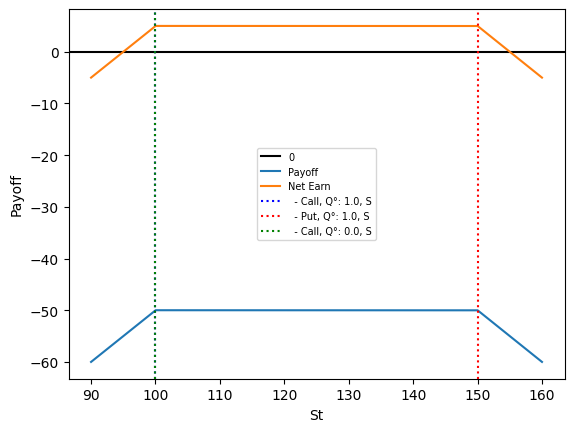

In [27]:
out = estrategias_comb(opcoes, m_rf = m_rf, c_rf = c_rf, qnt_ao= qnt_ao, s0 = s0, graph = True, method = "both", horizontal_zero = True, return_out = True)

# option1.payoffgraph()
# option2.payoffgraph()
# option3.payoffgraph()

output_table(out)

In [28]:
tabela = out[0].T
tabela["Custo Estratégia"] = -out[1]
tabela.iloc[100:-100:500,:]
# np.max(tabela.Payoff)
# np.min(tabela.Payoff)

,Ativo Objeto (St),Payoff,Net Earn (Resultado),%,Custo Estratégia
100,90.70007,-59.29993,-4.29993,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
600,94.20042,-55.79958,-0.79958,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
1100,97.70077,-52.29923,2.70077,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
1600,101.20112,-50.0,5.0,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
2100,104.70147,-50.0,5.0,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
2600,108.20182,-50.0,5.0,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
3100,111.70217,-50.0,5.0,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
3600,115.20252,-50.0,5.0,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
4100,118.70287,-50.0,5.0,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
4600,122.20322,-50.0,5.0,FCx0 >= 0 : Operação SEM CUSTO mas com ENTRADA...,-55
